# Final Alignment that worked for 3072X2048 images.
The mobotix camera views for optical and thermal images are not same. From the controlled burns in Konza, following are my observations, that will help in centering the camera and generating the overlapping images.
1.  the center of the images are not aligned, so crop regions are different for all the four sides.
2.  the perfect alignment of the images will depend on the precision at which the camera is fixed to the horizontal line.

#crop the optical image 
crop_bot = 240
crop_top = 215
crop_left = 685
crop_right = 445
img11 = img1[crop_top:-crop_bot, crop_left:-crop_right, :]


In [98]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
%matplotlib inline

In [215]:
img_file = "/Users/bhupendra/projects/thermal/data_test/sage_mobotix_cam_20220415-212141_6144x2048.jpg" 
img = cv2.imread(img_file)
img.shape

(2048, 6144, 3)

<function matplotlib.pyplot.show(close=None, block=None)>

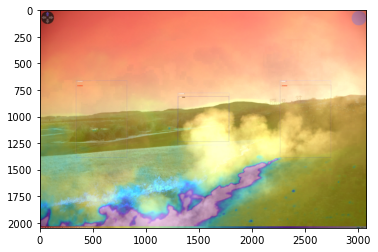

In [216]:
img1 = img[:, :3072, :]
img2 = img[:, 3072:, :]

dst = cv2.addWeighted(img2, 0.4, img1, 0.8, 0)
plt.imshow(dst)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

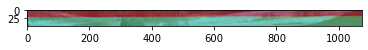

In [127]:
cor_list=[]

for crop_iter in range(1, 1000):
    crop_len = 1*crop_iter
    crop_wid = 1*crop_iter
    img11 = img1[crop_wid:-crop_wid, crop_len:-crop_len, :]
    width = img11.shape[1]
    height = img11.shape[0] 
    dim = (width, height)
    
    # resize image
    img22 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
    dst = cv2.addWeighted(img22, 0.4, img11, 0.8, 0)

    
    gray1 = cv2.cvtColor(img11, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img22, cv2.COLOR_BGR2GRAY)
    cor = np.corrcoef(gray1.flatten(), gray2.flatten())
    cor_list.append(cor[1, 0])
    
plt.imshow(dst)
plt.show


340

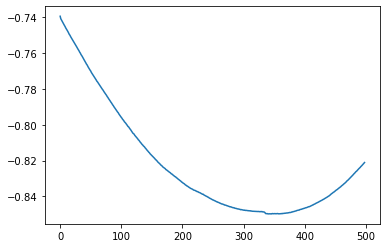

In [121]:
plt.plot(cor_list)
cor_list.index(min(cor_list))

-0.453868235183562


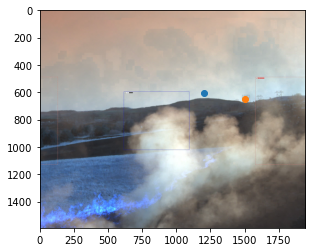

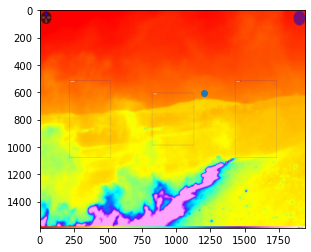

In [217]:
#crop the optical image 
crop_left = 685
crop_right = 445
crop_bot = 240
crop_top = 215
img11 = img1[crop_top:-crop_bot, crop_left:-crop_right, :]

width = img11.shape[1]
height = img11.shape[0] 
dim = (width, height)
    
# resize IR image and match
img22 = cv2.resize(img2, dim, interpolation = cv2.INTER_AREA)
dst = cv2.addWeighted(img22, 0.3, img11, 0.8, 0)

gray1 = cv2.cvtColor(img11, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img22, cv2.COLOR_BGR2GRAY)
cor = np.corrcoef(gray1.flatten(), gray2.flatten())
print(cor[1, 0])


plt.imshow(dst)
plt.savefig("/Users/bhupendra/projects/thermal/data_test/alignment2.jpg", dpi=600)

plt.imshow(img11)
plt.scatter(1200, 605)
plt.scatter(1500, 650)
plt.show()

plt.imshow(img22)
plt.scatter(1200, 605)
plt.scatter(1500, 650)
plt.show()




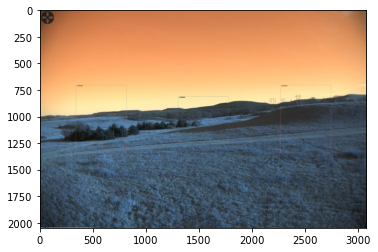

In [126]:
plt.imshow(img1)
